<a href="https://colab.research.google.com/github/CFathurrohman/10_Cyndu-Fathur-Rohman_PCVK_Ganjil_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUGAS PRAKTIKUM

1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

Mounted at /content/drive
Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


(-0.5, 255.5, 255.5, -0.5)

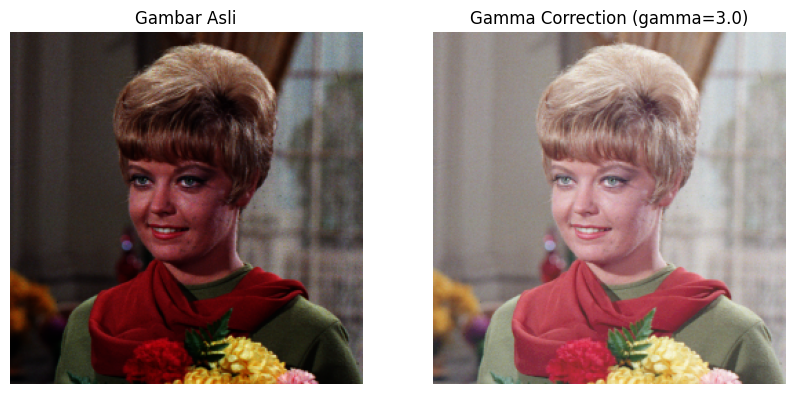

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import library yang dibutuhkan
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

# Load gambar dari Google Drive
img_path = '/content/drive/MyDrive/PCVK_MM/Images/female.tiff'
img = cv.imread(img_path)

# Konversi gambar ke RGB
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Fungsi Gamma Correction
def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

# Input nilai Gamma dari pengguna
print('Gamma Correction pada citra')
print('----------------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    gamma = 1  # Set nilai default jika input salah

# Terapkan Gamma Correction
gamma_corrected = gamma_correction(img, gamma)

# Tampilkan gambar asli dan hasil gamma correction
plt.figure(figsize=(10,5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Gambar Asli')
plt.axis('off')

# Gambar setelah gamma correction
plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected)
plt.title(f'Gamma Correction (gamma={gamma})')
plt.axis('off')


2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst. Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.

(-0.5, 255.5, 255.5, -0.5)

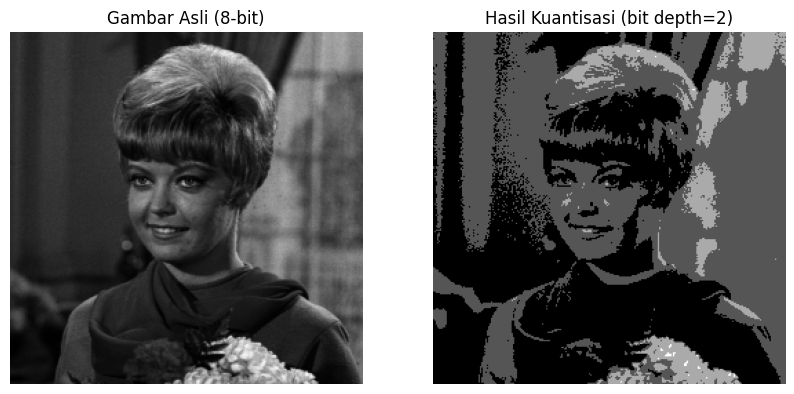

In [2]:
# Variabel awal
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Membaca gambar dalam mode grayscale
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff', cv.IMREAD_GRAYSCALE)

# Inisialisasi citra depth_image dengan ukuran dan tipe data yang sama dengan gambar asli
depth_image = np.zeros(original.shape, original.dtype)

# Fungsi untuk mengkuantisasi gambar berdasarkan bit depth
def quantize_image(image, bit_depth):
    # Hitung level berdasarkan bit depth
    level = 255 / (pow(2, bit_depth) - 1)

    # Kuantisasi: normalisasi gambar, kuantisasi, kemudian konversi kembali ke skala 0-255
    quantized = np.round(image / level) * level

    return quantized.astype(np.uint8)

# Terapkan kuantisasi berdasarkan bit depth yang dimasukkan
quantized_image = quantize_image(original, bit_depth)

# Tampilkan gambar asli dan hasil kuantisasi
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Gambar Asli (8-bit)')
plt.axis('off')

# Gambar setelah kuantisasi
plt.subplot(1, 2, 2)
plt.imshow(quantized_image, cmap='gray')
plt.title(f'Hasil Kuantisasi (bit depth={bit_depth})')
plt.axis('off')

3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.  
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

Catat hasil PSNR pada tabel berikut. Dari hasil yang sudah anda catat, tuliskan kesimpulan
anda:

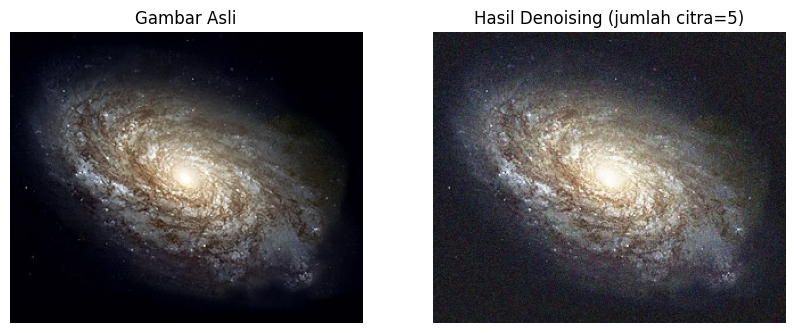

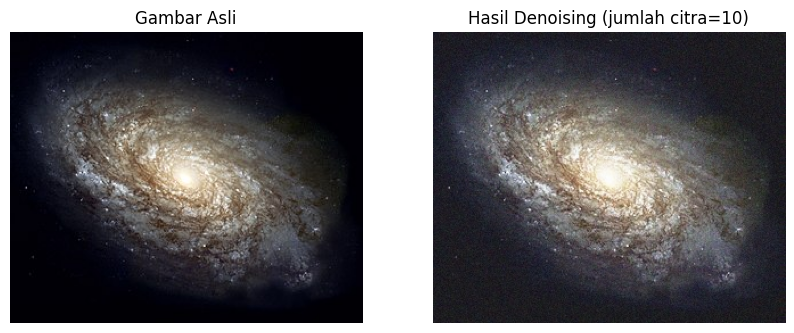

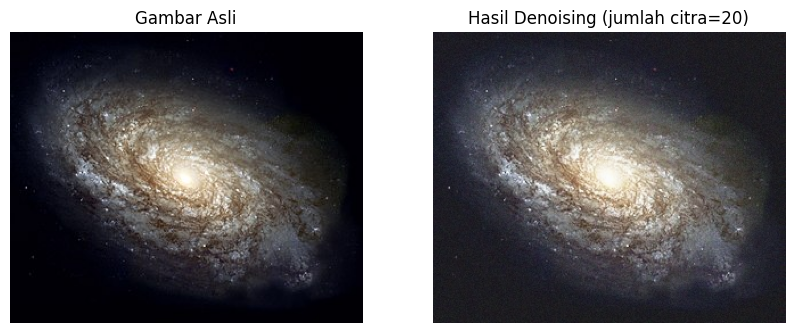

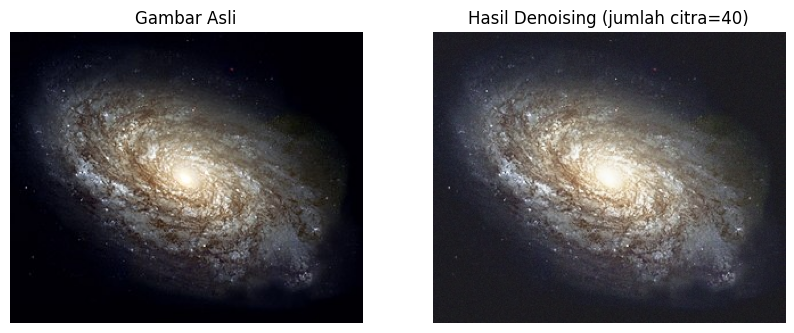

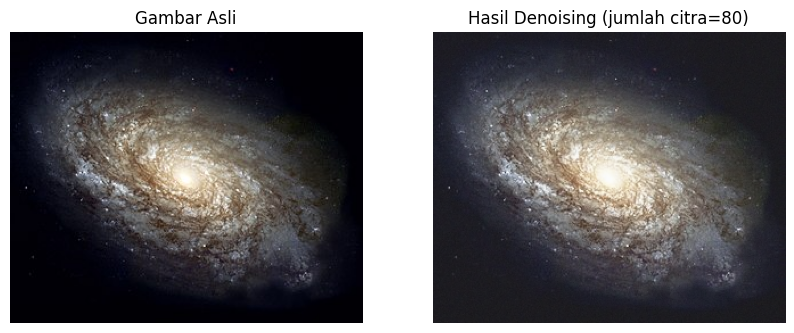

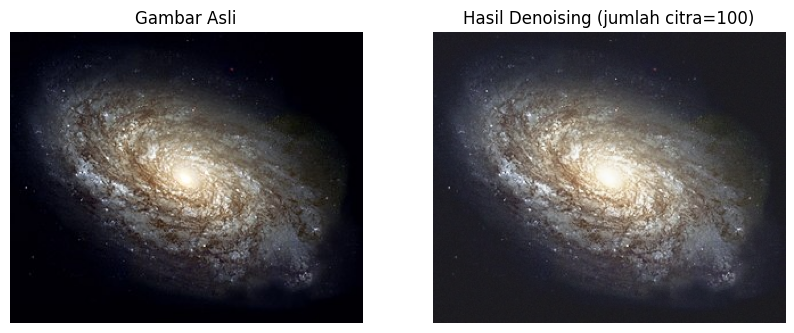

Tabel Hasil PSNR untuk berbagai jumlah citra:
Jumlah Citra | PSNR (dB)
--------------------------
           5 | 27.54 dB
          10 | 27.55 dB
          20 | 27.50 dB
          40 | 27.45 dB
          80 | 27.40 dB
         100 | 27.37 dB


In [3]:
import glob

# Fungsi untuk menghitung PSNR
def calculate_psnr(original_image, denoised_image):
    mse = np.mean((original_image - denoised_image) ** 2)
    if mse == 0:
        return float('inf')  # Jika MSE nol, berarti tidak ada noise sama sekali
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Fungsi untuk melakukan average denoising
def average_denoising(image_list):
    avg_image = np.zeros_like(image_list[0], dtype=np.float64)
    for img in image_list:
        avg_image += img.astype(np.float64)
    avg_image /= len(image_list)
    avg_image = np.clip(avg_image, 0, 255).astype(np.uint8)
    return avg_image

# Lokasi gambar asli dan gambar dengan noise
original_image_path = '/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg'
noised_images_path = '/content/drive/MyDrive/PCVK_MM/Images/noises/*.jpg'

# Membaca gambar asli
original = cv.imread(original_image_path)

# Membaca semua gambar dengan Gaussian noise
cv_img = []
for img in glob.glob(noised_images_path):
    n = cv.imread(img)
    cv_img.append(n)

# Daftar untuk menyimpan hasil PSNR
psnr_results = []

# Evaluasi untuk berbagai jumlah gambar (5, 10, 20, 40, 80, 100)
image_counts = [5, 10, 20, 40, 80, 100]

for count in image_counts:
    # Ambil subset gambar berdasarkan jumlah citra yang ditentukan
    subset_images = cv_img[:count]

    # Lakukan denoising
    denoised_image = average_denoising(subset_images)

    # Hitung PSNR
    psnr_value = calculate_psnr(original, denoised_image)
    psnr_results.append((count, psnr_value))

    # Tampilkan hasil denoising
    plt.figure(figsize=(10, 5))

    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.title('Gambar Asli')
    plt.axis('off')

    # Gambar setelah denoising
    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(denoised_image, cv.COLOR_BGR2RGB))
    plt.title(f'Hasil Denoising (jumlah citra={count})')
    plt.axis('off')

    plt.show()

# Tampilkan hasil PSNR dalam tabel
print("Tabel Hasil PSNR untuk berbagai jumlah citra:")
print("Jumlah Citra | PSNR (dB)")
print("--------------------------")
for count, psnr in psnr_results:
    print(f"{count:12} | {psnr:.2f} dB")


Kesimpulan : <br>
Hasil PSNR menunjukkan nilai yang relatif stabil di kisaran 27-28 dB meskipun jumlah citra yang digunakan untuk average denoising meningkat. Ini mengindikasikan bahwa penambahan jumlah citra tidak memberikan perbaikan signifikan dalam kualitas citra hasil denoising.








4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:

(-0.5, 255.5, 255.5, -0.5)

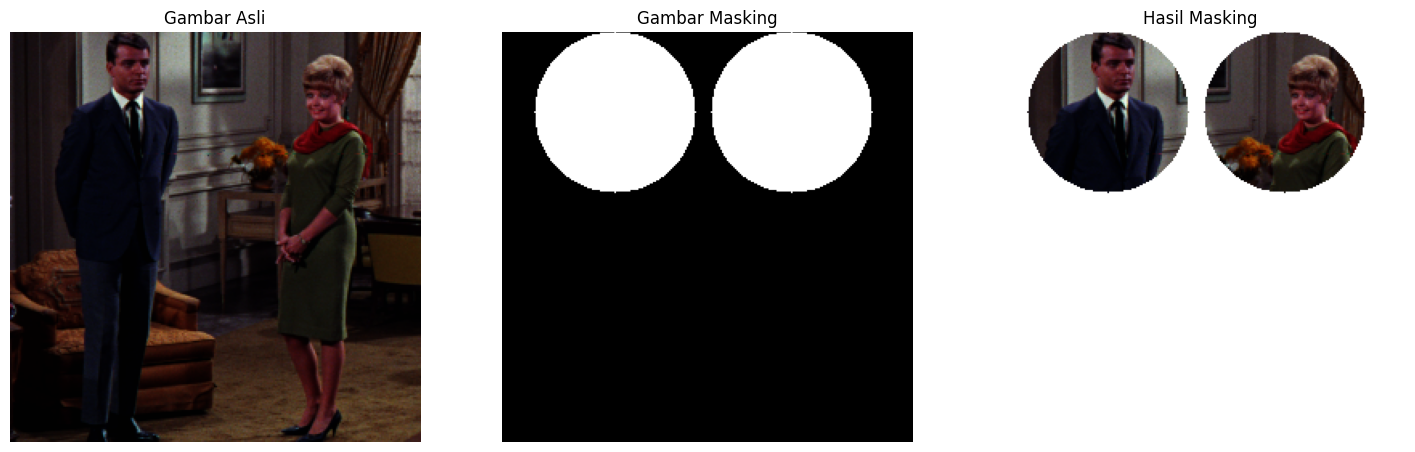

In [4]:
# Mengambil gambar
image_path = '/content/drive/MyDrive/PCVK_MM/Images/couple.tiff'
image = cv.imread(image_path)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Membuat mask dengan latar belakang hitam
mask = np.zeros(image.shape[:2], dtype=np.uint8)

# Menggambar bentuk
center1 = (70, 50)
radius1 = 50
cv.circle(mask, center1, radius1, (255), thickness=-1)

center2 = (180, 50)
radius2 = 50
cv.circle(mask, center2, radius2, (255), thickness=-1)

# Membuat gambar masking dengan latar belakang hitam
mask_display = np.zeros_like(image_rgb)
mask_display[mask == 255] = [255, 255, 255]

# Mengaplikasikan mask ke gambar
masked_image = cv.bitwise_and(image_rgb, image_rgb, mask=mask)

# Membuat gambar hasil masking dengan latar belakang putih
result_image = np.ones_like(image_rgb) * 255
result_image[mask == 255] = masked_image[mask == 255]

# Tampilkan gambar asli, gambar masking, dan hasil masking
plt.figure(figsize=(18, 6))

# Gambar asli
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Gambar Asli')
plt.axis('off')

# Gambar masking
plt.subplot(1, 3, 2)
plt.imshow(mask_display)
plt.title('Gambar Masking')
plt.axis('off')

# Gambar hasil masking
plt.subplot(1, 3, 3)
plt.imshow(result_image)
plt.title('Hasil Masking')
plt.axis('off')

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

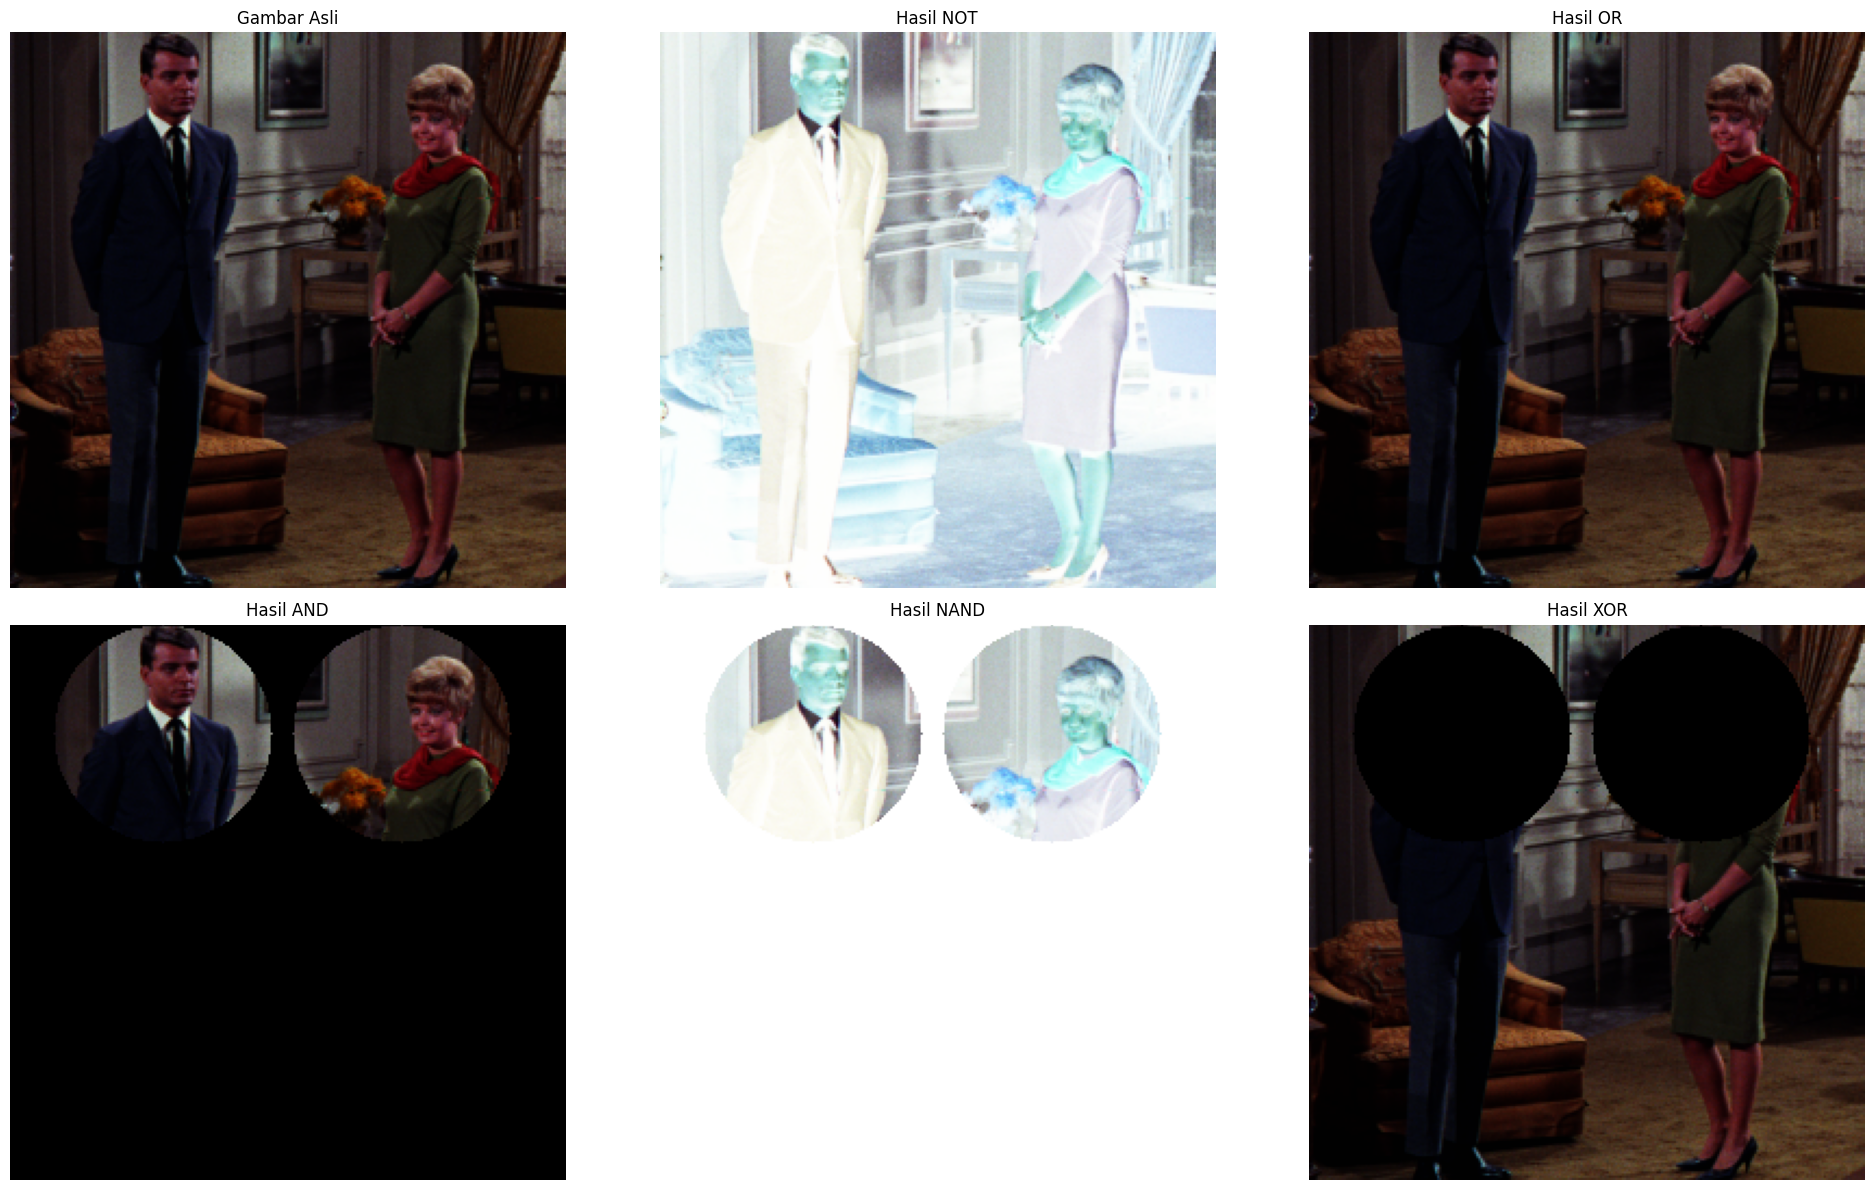

In [20]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Mengambil gambar
image_path = '/content/drive/MyDrive/PCVK_MM/Images/couple.tiff'
image = cv.imread(image_path)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Membuat mask dengan latar belakang hitam
mask = np.zeros(image.shape[:2], dtype=np.uint8)

# Menggambar bentuk
center1 = (70, 50)
radius1 = 50
cv.circle(mask, center1, radius1, (255), thickness=-1)

center2 = (180, 50)
radius2 = 50
cv.circle(mask, center2, radius2, (255), thickness=-1)

# Mengaplikasikan mask ke gambar
masked_image = cv.bitwise_and(image_rgb, image_rgb, mask=mask)

# Operasi logika
not_mask = cv.bitwise_not(image_rgb)               # NOT
or_result = cv.bitwise_or(image_rgb, masked_image)  # OR
and_result = cv.bitwise_and(image_rgb, masked_image)  # AND
nand_result = cv.bitwise_not(and_result)      # NAND (NOT of AND)
xor_result = cv.bitwise_xor(image_rgb, masked_image)  # XOR

# Tampilkan gambar asli, gambar masking, dan hasil masking serta hasil operasi
plt.figure(figsize=(20, 12))

# Gambar asli
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Gambar Asli')
plt.axis('off')

# Gambar NOT
plt.subplot(2, 3, 2)
plt.imshow(not_mask, cmap='gray')
plt.title('Hasil NOT')
plt.axis('off')

# Gambar OR
plt.subplot(2, 3, 3)
plt.imshow(or_result)
plt.title('Hasil OR')
plt.axis('off')

# Gambar AND
plt.subplot(2, 3, 4)
plt.imshow(and_result)
plt.title('Hasil AND')
plt.axis('off')

# Gambar NAND
plt.subplot(2, 3, 5)
plt.imshow(nand_result)
plt.title('Hasil NAND')
plt.axis('off')

# Gambar XOR
plt.subplot(2, 3, 6)
plt.imshow(xor_result)
plt.title('Hasil XOR')
plt.axis('off')

plt.tight_layout()
plt.show()
